# Paso 0: Dependencias

In [98]:
import pandas as pd
import numpy as np
import nltk
import re

In [99]:
# settings en nltk: tokenizador y stopwords
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words_nltk = stopwords.words('english')
from nltk.stem.porter import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josrenca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josrenca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
archivo = 'cleanedVariables-standarized-respuestaBinaria.pkl'
rutaArvhivo = path + archivo
df = pd.read_pickle(rutaArvhivo)

In [101]:
df.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Give_Way', 'Hour', 'Junction',
       'Nautical_Twilight', 'No_Exit', 'Railway', 'Roundabout', 'Severity',
       'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop', 'Street',
       'Sunrise_Sunset', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Weather_Condition', 'Wind_Direction', 'dayOfWeek', 'month',
       'newSeverity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Description'],
      dtype='object')

# Inicio del proceso LDA
# filtrar las columnas de interés

df = df[['Severity','Description']]
df.head()

In [103]:
df.count()

Severity       3027853
Description    3027853
dtype: int64

In [104]:
df = df[df['Description'].notna()]
for i in range(0,500):
    print(df['Description'][i])

Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.
Accident on I-75 Southbound at Exits 52 52B US-35. Expect delays.
Accident on McEwen Rd at OH-725 Miamisburg Centerville Rd. Expect delays.
Accident on I-270 Outerbelt Northbound near Exit 29 OH-3 State St. Expect delays.
Accident on Oakridge Dr at Woodward Ave. Expect delays.
Accident on I-75 Southbound at Exit 54B Grand Ave. Expect delays.
Accident on Notre Dame Ave at Warner Ave. Expect delays.
Right hand shoulder blocked due to accident on I-270 Outerbelt Westbound at Exit 29 OH-3 State St.
Accident on I-270 Outerbelt Northbound at Exits 7 7A 7B US-40 Broad St. Expect delays.
One lane blocked due to accident on I-70 Westbound at Exits 110 110A 110B Brice Rd. Expect delays.
Accident on Revere Ave at Watervliet Ave. Expect delays.
Accident on Salem Ave at Hillcrest Ave / Kensington Dr. Expect delays.
Accident on OH-16 Broad St at James Rd. Expect delays.
Accident on Wayne Ave at Glencoe Ave. Expect delays.
Ac

In [105]:
df.count()

Severity       3027853
Description    3027853
dtype: int64

In [106]:
df.shape

(3027853, 2)

In [107]:
stemmer = PorterStemmer()

In [108]:
dictionary = {'st' : 'street', 'rd' : 'road', 'ave' : 'avenue', 'i': 'interstate'}

In [109]:
stop_words = stop_words_nltk + ['us', 'oh']

In [110]:
def mapeo(w):
    if w in dictionary.keys():
        return dictionary[w]
    else:
        return w

In [111]:
# función general para preparación de datos: tokenización, remoción caracteres especiales
# minusculas.... no incluido stemming y lematización.
def textprep(line):
    tokens = nltk.word_tokenize(str(line))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z]+','',w) for w in tokens]
    tokens = [mapeo(w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [stemmer.stem(w) for w in tokens]
    return tokens

In [112]:
%%time
# creación de columna con tokenización de una columna de interés especifica
df['tokens'] = df.apply(lambda row: textprep(row['Description']), axis=1)
df.head()

Wall time: 26min 32s


,Severity,Description,tokens
0,0,Accident on OH-32 State Route 32 Westbound at ...,"[accid, state, rout, westbound, dela, palma, r..."
1,1,Accident on I-75 Southbound at Exits 52 52B US...,"[accid, interst, southbound, exit, expect, delay]"
2,0,Accident on McEwen Rd at OH-725 Miamisburg Cen...,"[accid, mcewen, road, miamisburg, centervil, r..."
3,1,Accident on I-270 Outerbelt Northbound near Ex...,"[accid, interst, outerbelt, northbound, near, ..."
4,0,Accident on Oakridge Dr at Woodward Ave. Expec...,"[accid, oakridg, woodward, avenu, expect, delay]"


In [114]:
for i in range(0,10):
    print(df['Description'][i])
    print(df['tokens'][i])

Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.
['accid', 'state', 'rout', 'westbound', 'dela', 'palma', 'road', 'expect', 'delay']
Accident on I-75 Southbound at Exits 52 52B US-35. Expect delays.
['accid', 'interst', 'southbound', 'exit', 'expect', 'delay']
Accident on McEwen Rd at OH-725 Miamisburg Centerville Rd. Expect delays.
['accid', 'mcewen', 'road', 'miamisburg', 'centervil', 'road', 'expect', 'delay']
Accident on I-270 Outerbelt Northbound near Exit 29 OH-3 State St. Expect delays.
['accid', 'interst', 'outerbelt', 'northbound', 'near', 'exit', 'state', 'street', 'expect', 'delay']
Accident on Oakridge Dr at Woodward Ave. Expect delays.
['accid', 'oakridg', 'woodward', 'avenu', 'expect', 'delay']
Accident on I-75 Southbound at Exit 54B Grand Ave. Expect delays.
['accid', 'interst', 'southbound', 'exit', 'grand', 'avenu', 'expect', 'delay']
Accident on Notre Dame Ave at Warner Ave. Expect delays.
['accid', 'notr', 'dame', 'avenu', 'warner', 'avenu'

### Construir el BoW (diccionario) de términos

In [115]:
# Creación del BoW - en gensim es Dictionary
from gensim.corpora import Dictionary
dictionary = Dictionary(df.tokens)

In [116]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in df.tokens]

In [118]:
print(dictionary)

Dictionary(75120 unique tokens: ['accid', 'dela', 'delay', 'expect', 'palma']...)


### Construir matriz de documentos vs términos

In [121]:
# libreria para paralelizar
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in df.tokens])
pool.close()
print(time.time()-t0)

735.5902318954468


### Construir modelo LDA

In [122]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [123]:
def compute_coherence_values(dictionary, corpus, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

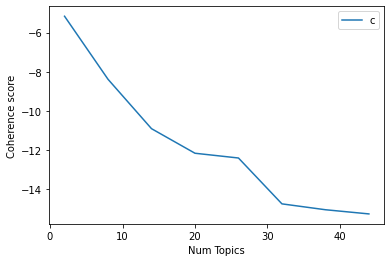

In [124]:
%%
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, start=2, limit=50, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [125]:
from gensim.models.ldamulticore import LdaMulticore

t0 = time.time()
lda_model = LdaMulticore(doc_term_matrix, num_topics=3, id2word = dictionary, passes=10, workers=10)
print(time.time()-t0)

4599.23717212677


In [126]:
def assigntopic(doc):
    vector = lda_model[dictionary.doc2bow(doc)] 
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    #vector = max(vector,key=lambda item: item[1])
    return vector

In [127]:
df['topics'] = df.apply(lambda row: assigntopic(row['tokens']), axis=1)
df.head()

,Severity,Description,tokens,topics
0,0,Accident on OH-32 State Route 32 Westbound at ...,"[accid, state, rout, westbound, dela, palma, r...","[(1, 0.5350446), (2, 0.2705823), (0, 0.19437303)]"
1,1,Accident on I-75 Southbound at Exits 52 52B US...,"[accid, interst, southbound, exit, expect, delay]","[(1, 0.8993658), (2, 0.050644066), (0, 0.04999..."
2,0,Accident on McEwen Rd at OH-725 Miamisburg Cen...,"[accid, mcewen, road, miamisburg, centervil, r...","[(0, 0.675949), (1, 0.28597477), (2, 0.0380762)]"
3,1,Accident on I-270 Outerbelt Northbound near Ex...,"[accid, interst, outerbelt, northbound, near, ...","[(1, 0.76498413), (2, 0.2025737), (0, 0.032442..."
4,0,Accident on Oakridge Dr at Woodward Ave. Expec...,"[accid, oakridg, woodward, avenu, expect, delay]","[(2, 0.42534015), (1, 0.3688788), (0, 0.2057811)]"


### Ejemplos de tópicos del modelo

In [128]:
# Mostrar los términos y sus pesos de un documento
print(list(lda_model[doc_term_matrix[0]]))

# Mostrar los términos más relevantes de los tópicos más relevantes tópico y sus pesos
print(lda_model.print_topics(num_topics=10, num_words=3))

[(0, 0.19434898), (1, 0.5350637), (2, 0.27058735)]
[(0, '0.217*"accid" + 0.204*"road" + 0.038*"rdexit"'), (1, '0.118*"block" + 0.112*"accid" + 0.109*"lane"'), (2, '0.265*"accid" + 0.088*"street" + 0.082*"avenu"')]


In [129]:
lda_topic_assignment = [max(p,key=lambda item: item[1]) for p in lda_model[corpus]]

## Visualización de todos los tópicos

In [130]:
import pyLDAvis
from pyLDAvis import gensim

t0 = time.time()
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary, sort_topics = False)
print(time.time()-t0)
vis

3376.8341217041016


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.184183  0.228809       1        1  27.189579
1     -0.330392  0.018231       2        1  46.116623
2      0.146209 -0.247039       3        1  26.693806, topic_info=        Term          Freq         Total Category  logprob  loglift
5       road  1.067079e+06  1.067079e+06  Default  30.0000  30.0000
26     block  1.046162e+06  1.046162e+06  Default  29.0000  29.0000
33      lane  9.619090e+05  9.619090e+05  Default  28.0000  28.0000
27       due  8.021410e+05  8.021410e+05  Default  27.0000  27.0000
18    street  4.529870e+05  4.529870e+05  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
0      accid  1.358849e+06  3.486242e+06   Topic3  -1.3276   0.3786
193      way  2.371464e+04  4.654636e+04   Topic3  -5.3759   0.6464
15      near  2.731032e+04  6.739259e+04   Topic3  -5.2347   0.4175
203     park  1.347654e+04  2.311792e+04   Topic3  -5.9410   0.7811
940  univers  8.761649e+03  1.092847e+04   Topic3  -6.3716   1.0998

[151 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
0          1  0.325194      accid
0          2  0.285032      accid
0          3  0.389775      accid
2364       2  0.000143       area
2364       3  0.999862       area
...      ...       ...        ...
8          2  0.999898  westbound
8          3  0.000090  westbound
10679      2  0.999621  westchest
975        2  0.000163    western
975        3  0.999916    western

[221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Guardar la visualización en un archivo HTML

In [131]:
df.head()

,Severity,Description,tokens,topics
0,0,Accident on OH-32 State Route 32 Westbound at ...,"[accid, state, rout, westbound, dela, palma, r...","[(1, 0.5350446), (2, 0.2705823), (0, 0.19437303)]"
1,1,Accident on I-75 Southbound at Exits 52 52B US...,"[accid, interst, southbound, exit, expect, delay]","[(1, 0.8993658), (2, 0.050644066), (0, 0.04999..."
2,0,Accident on McEwen Rd at OH-725 Miamisburg Cen...,"[accid, mcewen, road, miamisburg, centervil, r...","[(0, 0.675949), (1, 0.28597477), (2, 0.0380762)]"
3,1,Accident on I-270 Outerbelt Northbound near Ex...,"[accid, interst, outerbelt, northbound, near, ...","[(1, 0.76498413), (2, 0.2025737), (0, 0.032442..."
4,0,Accident on Oakridge Dr at Woodward Ave. Expec...,"[accid, oakridg, woodward, avenu, expect, delay]","[(2, 0.42534015), (1, 0.3688788), (0, 0.2057811)]"


In [132]:
path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
archivo = 'ModeloNLP-v2.html'
rutaArchivo = path + 'Modelo NLP\\'+ archivo
pyLDAvis.save_html(vis, rutaArchivo)

In [ ]:
path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
archivo = 'datosNLP-v2.pkl'
rutaArchivo = path + 'Modelo NLP\\'+ archivo
df.to_pickle(rutaArchivo)

In [ ]:
from gensim.test.utils import datapath

temp_file = datapath("/content/gdrive/My Drive/taller3/modeltitle/ldamodel1/ldamodelv1")
lda_model.save(temp_file)

#Load a potentially pretrained model from disk.
#lda = LdaModel.load(temp_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
